In [1]:
import pandas as pd
import numpy as np
import difflib 

# Load impact ranking file
impact = pd.read_csv("journalimpact2014.csv")

# Remove unecessary columns
impact = impact.drop(impact.columns[5::], axis=1)


# Rename Issn --> ISSN  
impact = impact.rename(columns = {"Issn":"ISSN"})


In [2]:
# Keep the first ISSN and keep it in a new column
impact["ISSN1"] = impact.ISSN.str.replace(", .*", "")
impact["ISSN1"] = impact.ISSN1.str.replace("ISSN", "")
impact["ISSN1"] = impact.ISSN1.str.replace("X", "")
impact

# Keep the second ISSN if it appears in a new column and only keep unique values
impact["ISSN2"] = impact.ISSN.str.replace(".*, ", "")
impact["ISSN2"] = impact.ISSN2.str.replace("ISSN", "")
impact["ISSN2"] = impact.ISSN2.str.replace("X", "")

# to compare by name more normalising required

impact["Title"] = impact.Title.str.lower()
impact["Title"] = impact.Title.str.replace("-.*","")

impact

,Rank,Title,Type,ISSN,SJR,ISSN1,ISSN2
0,1,ca,journal,"ISSN 15424863, 00079235",43.924,15424863,00079235
1,2,annual review of immunology,journal,"ISSN 07320582, 15453278",35.661,07320582,15453278
2,3,reviews of modern physics,journal,"ISSN 00346861, 15390756",34.257,00346861,15390756
3,4,nature reviews genetics,journal,"ISSN 14710056, 14710064",29.060,14710056,14710064
4,5,cell,journal,"ISSN 00928674, 10974172",28.410,00928674,10974172
5,6,nature reviews immunology,journal,ISSN 14741733,27.410,14741733,14741733
6,7,quarterly journal of economics,journal,"ISSN 00335533, 15314650",27.193,00335533,15314650
7,8,nature reviews cancer,journal,ISSN 1474175X,24.713,1474175,1474175
8,9,nature reviews molecular cell biology,journal,"ISSN 14710072, 14710080",24.474,14710072,14710080
9,10,nature genetics,journal,ISSN 10614036,23.792,10614036,10614036


In [3]:
# Load the data output file
refcs_or = pd.read_csv("REF2014Data_output.csv")

## Keep only the volume title and ISSN number
refcs_or = refcs_or.drop(refcs_or.columns[[range(1,8)]], axis=1)
refcs_or = refcs_or.drop(refcs_or.columns[[range(2,7)]], axis=1)
refcs_or = refcs_or.drop(refcs_or.columns[3::], axis=1)
refcs_or["ISSN"] = refcs_or.ISSN.str.replace('X', '')
refcs_or["ISSN"] = refcs_or.ISSN.str.replace('-', '')

# to compare by name more normalising required

refcs_or["VolumeTitle"] = refcs_or.VolumeTitle.str.lower()
refcs_or["VolumeTitle"] = refcs_or.VolumeTitle.str.replace("-.*","")
refcopy = refcs_or

refcs_or

,UKPRN,VolumeTitle,ISSN
0,10007760,economic inquiry,00952583
1,10007760,the b.e. journal of macroeconomics (topics),19351690
2,10007760,the north american journal of economics and fi...,10629408
3,10007760,journal of computational and applied mathematics,03770427
4,10007760,journal of economic dynamics and control,01651889
5,10007760,calcolo,00080624
6,10007760,foundations of computational mathematics,16153375
7,10007760,economics: the open,18646042
8,10007760,economics: the open,18646042
9,10007760,econometric theory,02664666


In [4]:
# Compile a dictionary of Volume title and Rank to merge by names
namerank = {}
for index, row in impact.iterrows():
    namerank[row["Title"]] = row["SJR"]

In [5]:
# Compile a list of index from the REF data and volume title
reference = {}
for index, row in refcs_or.iterrows():
    reference[index] = row["VolumeTitle"]

In [6]:
# Merge by name returning index location and ranking

indeximpact = {}
for index in reference:
    if reference[index] in namerank:
        indeximpact[index] = namerank[reference[index]]
        
len(indeximpact)

1900

In [7]:

refcopy["Rank1"] = pd.Series(indeximpact)

refcopy = refcopy.dropna()

In [8]:
## Find the average ranks to fill the nans with the mean ranks for each uni
sum_rank = {}
len_rank = {}

#for index, rows in av_rankd.iterrows():

for index, rows in refcopy.iterrows():
    if rows["UKPRN"] not in len_rank:
        len_rank[rows["UKPRN"]] = 1
    else:
        len_rank[rows["UKPRN"]] += 1
        
for index, rows in refcopy.iterrows():    
    if rows["UKPRN"] not in sum_rank:
        sum_rank[rows["UKPRN"]] = rows["Rank1"]
    else:
        sum_rank[rows["UKPRN"]] += rows["Rank1"]
        
av_rank = {}

for univd in len_rank:
    for univid in sum_rank:
        if univd == univid:
            av_rank[univd] = sum_rank[univd] / len_rank[univid]

In [9]:
#

indexlist = list()
rankinglist = list()

for index, row in refcopy.iterrows():
    for uniid in av_rank:
        if uniid == row["UKPRN"]:
            indexlist.append(uniid)
            rankinglist.append(av_rank[uniid])


In [10]:
## Now to create a dictionary with the average ranking per uni
unijourank = dict(zip(indexlist,rankinglist))

In [11]:
## Now to add the four star rating
fourstr = pd.read_csv("REF2014Data_submissionprofile.csv")



fourstr = fourstr[fourstr["Profile"].str.contains("Output")]
fourstr = fourstr.drop(fourstr.columns[[1,2,3,5,6,7,8]], axis=1)

fourstrdic = {}

for index, row in fourstr.iterrows():
    fourstrdic[row["UKPRN"]] = row["FourStar"]

In [12]:
rankfour = {}

for uni in fourstrdic:
    for unis in unijourank:
        if unis == uni:
            rankfour[unijourank[unis]] = fourstrdic[uni]

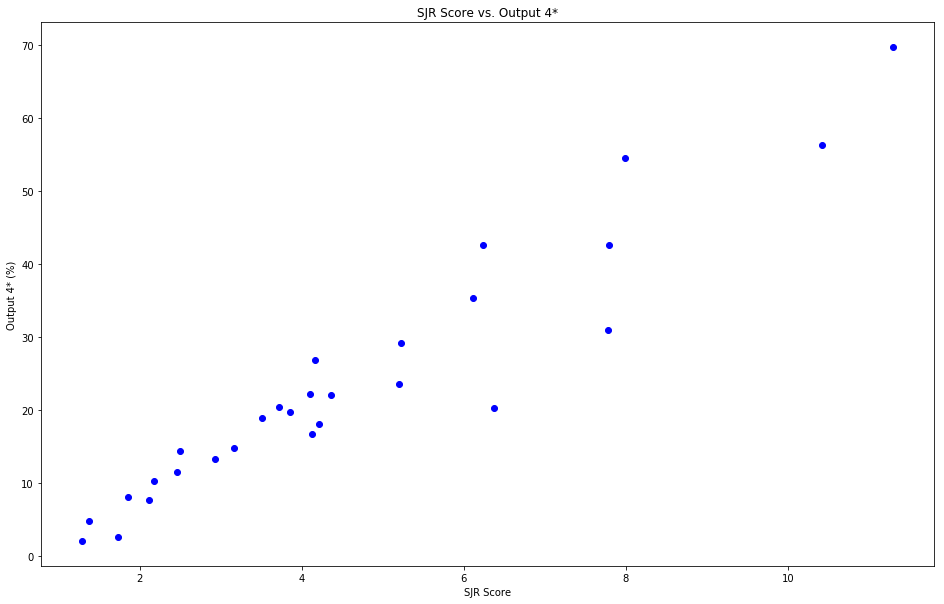

In [24]:
import matplotlib.pylab as plt
%matplotlib inline

lists = sorted(rankfour.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(figsize = [16,10])
plt.plot(x, y, "bo")
plt.xlabel("SJR Score")
plt.ylabel("Output 4* (%)")
plt.title("SJR Score vs. Output 4*")
plt.savefig("SJR_4*.jpeg")
#plt.xscale('log')
#plt.yscale('log')

In [14]:
from scipy.stats.stats import pearsonr

pearsonr(x,y)

(0.95296631689836264, 5.3702389508795007e-15)

In [23]:
dataframe  = pd.DataFrame.from_dict(fourstrdic, orient = "index")

dataframe = dataframe.rename(columns = {0:"4*"})

unijourankx = tuple(unijourank.items())

x, unijouranky = zip(*unijourankx)

dataframe["SJR Score"] = pd.Series(unijouranky).values

dataframe.sort_values("SJR Score")

dataframe.to_csv("4* to SJR score.csv")